# EDA

## Distribution of features

In [31]:
import plot_smooth_pdf as pdf_

Distributions of first 28 columns


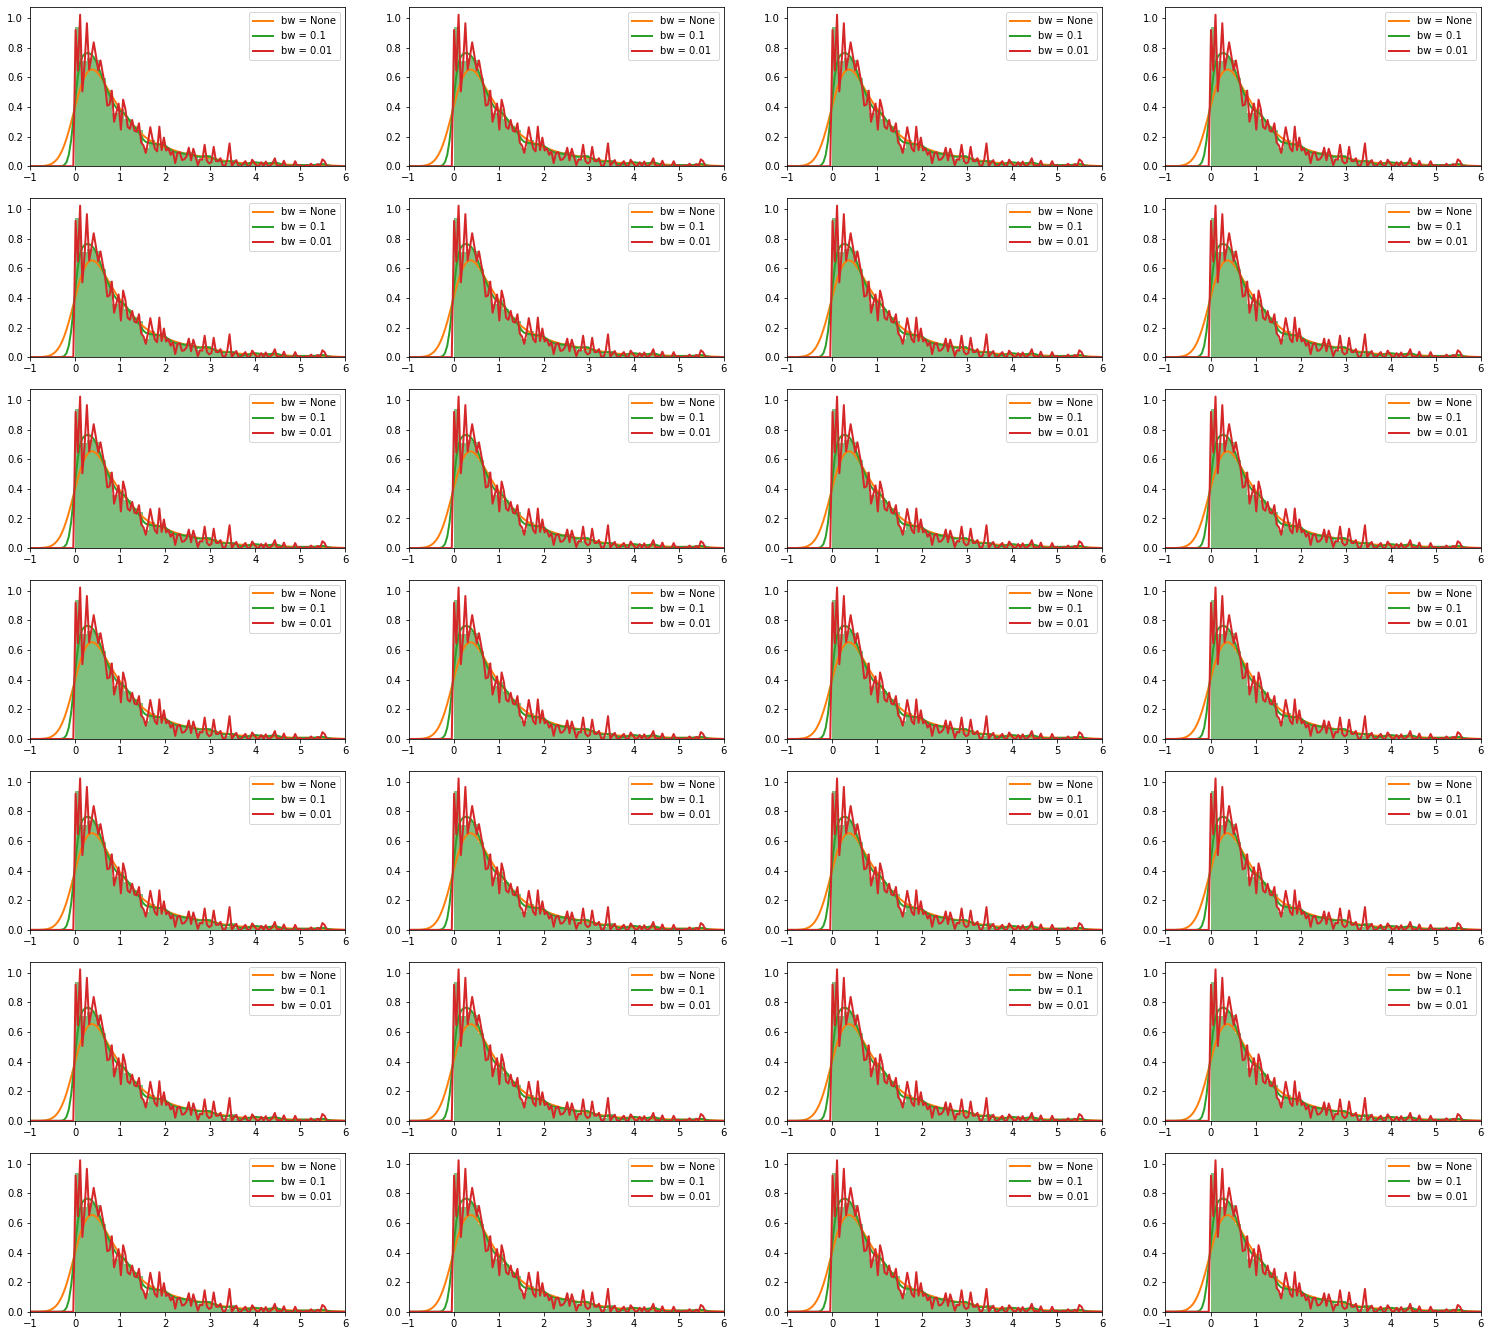

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
print('Distributions of first 28 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(X_train)[2:30]):
    plt.subplot(7, 4, i + 1)
    plot_smoothed_pdf(X_train.iloc[i])